# **Maestría en Análisis de Datos y Sistemas Inteligentes**

## **Exploración de Datos**
**Analizando Agrupamiento en Datasets**


*   Edwar David Macías López
*   Miguel Andres Arias Romero
*   Javier Santiago Hernandez Mendez
*   Jhon Freddy Hernandez Corzo



Se encontró un dataset de 285.000 registros, desde el 2015 a 2021, con la accidentalidad de los barrios de bogotá, 
el dataset venia de esta forma, se le hizo una etapa de limpieza y alistamiento, se eliminaron algunas columnas que no se declaraban como relevantes y se entregaron los siguientes resultados para llegar a resolver el objetivo, 

el cuál en este caso es
### **Analizar los accidentes de transito en bogotá, identificacon horas pico con mayor accidentalidad y distribución por localidades.**
 
Para el desarrollo del análisis de los datos y la aplicación de estadística correlacional, junto a su visualización de datos usando seaborn:


In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/EdwMacias/siniestrosBogota/refs/heads/main/SiniestrosBog_DataSet.csv"
df = pd.read_csv(url)

## **2. Adquisición de los Datos**

Usamos la API de Kaggle para poder obtener los datos

**Importamos Librerías:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df.head()

,FECHA,HORA,LOCALIDAD,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,ACTOR VIAL
0,1/1/2015,01:05:00,Puente Aranda,Con Heridos,Atropello,NaN,NaN,KR 64A-CL 2C 02,CONDUCTOR
1,1/1/2015,05:50:00,Bosa,Con Heridos,Volcamiento,NaN,NaN,AV AVENIDA DEL SUR-KR 65A 41,MOTOCICLISTA
2,1/1/2015,07:15:00,Ciudad Bolívar,Con Heridos,Volcamiento,NaN,NaN,KR 19D-CL 62 S 02,MOTOCICLISTA
3,1/1/2015,09:30:00,Kennedy,Solo Daños,Choque,1.0,NaN,KR 79-CL 42F S 71,CONDUCTOR
4,1/1/2015,09:45:00,Engativá,Con Heridos,Choque,1.0,NaN,CL 66A-KR 76 02,CONDUCTOR


In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196152 entries, 0 to 196151
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   FECHA        196152 non-null  object 
 1   HORA         196152 non-null  object 
 2   LOCALIDAD    196152 non-null  object 
 3   GRAVEDAD     196152 non-null  object 
 4   CLASE        196152 non-null  object 
 5   CHOQUE       167910 non-null  float64
 6   OBJETO_FIJO  6689 non-null    float64
 7   DIRECCION    196152 non-null  object 
 8   ACTOR VIAL   196004 non-null  object 
dtypes: float64(2), object(7)
memory usage: 13.5+ MB


In [5]:
df.describe()

,CHOQUE,OBJETO_FIJO
count,167910.000000,6689.000000
mean,1.127717,5.318583
std,0.610152,3.756058
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,5.000000
75%,1.000000,10.000000
max,5.000000,16.000000


In [6]:
df.isnull().sum()

FECHA               0
HORA                0
LOCALIDAD           0
GRAVEDAD            0
CLASE               0
CHOQUE          28242
OBJETO_FIJO    189463
DIRECCION           0
ACTOR VIAL        148
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(65)

In [8]:
df.drop(columns=['DIRECCION', 'CHOQUE', 'OBJETO_FIJO'], inplace=True)
df.drop_duplicates(inplace=True)
df = df.dropna()
df.head()

,FECHA,HORA,LOCALIDAD,GRAVEDAD,CLASE,ACTOR VIAL
0,1/1/2015,01:05:00,Puente Aranda,Con Heridos,Atropello,CONDUCTOR
1,1/1/2015,05:50:00,Bosa,Con Heridos,Volcamiento,MOTOCICLISTA
2,1/1/2015,07:15:00,Ciudad Bolívar,Con Heridos,Volcamiento,MOTOCICLISTA
3,1/1/2015,09:30:00,Kennedy,Solo Daños,Choque,CONDUCTOR
4,1/1/2015,09:45:00,Engativá,Con Heridos,Choque,CONDUCTOR


In [9]:
gravedad_map = {
    'Solo Daños': 0,
    'Con Heridos': 1,
    'Con Muertos': 2
}
df['GRAVEDAD_COD'] = df['GRAVEDAD'].map(gravedad_map)

In [10]:
df['HORA_NUM'] = df['HORA'].str.extract(r'(\d{1,2})').astype(float)

def categorizar_franja(hora):
    if 5 <= hora < 10:
        return 'Madrugada'
    elif 10 <= hora < 14:
        return 'Mañana'
    elif 14 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 22:
        return 'Noche'
    else:
        return 'Madrugada Tarde'

df['HORA_FRANJA'] = df['HORA_NUM'].apply(categorizar_franja)

In [11]:
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
df['DIA_SEMANA'] = df['FECHA'].dt.day_name()

df.head()

,FECHA,HORA,LOCALIDAD,GRAVEDAD,CLASE,ACTOR VIAL,GRAVEDAD_COD,HORA_NUM,HORA_FRANJA,DIA_SEMANA
0,2015-01-01,01:05:00,Puente Aranda,Con Heridos,Atropello,CONDUCTOR,1,1.0,Madrugada Tarde,Thursday
1,2015-01-01,05:50:00,Bosa,Con Heridos,Volcamiento,MOTOCICLISTA,1,5.0,Madrugada,Thursday
2,2015-01-01,07:15:00,Ciudad Bolívar,Con Heridos,Volcamiento,MOTOCICLISTA,1,7.0,Madrugada,Thursday
3,2015-01-01,09:30:00,Kennedy,Solo Daños,Choque,CONDUCTOR,0,9.0,Madrugada,Thursday
4,2015-01-01,09:45:00,Engativá,Con Heridos,Choque,CONDUCTOR,1,9.0,Madrugada,Thursday


## **3. Exploración de los datos**

Buscarmos normalizar, estandarizar o escalar las variables de entrada:

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQP6uPAOg9GGnV7PRmAw5xttf-_jfokN-TLw&s" width=400>



### **<font color=red>Estadísticas</font>**

In [12]:
np.max(df.iloc[:,:-1], axis=0)

FECHA           2020-12-31 00:00:00
HORA                       23:59:00
LOCALIDAD                      Usme
GRAVEDAD                 Solo Daños
CLASE                   Volcamiento
ACTOR VIAL                   PEATON
GRAVEDAD_COD                      2
HORA_NUM                       23.0
HORA_FRANJA                   Tarde
dtype: object

### **<font color=red>Visualización de los Datos</font>**

#### **Histogramas**

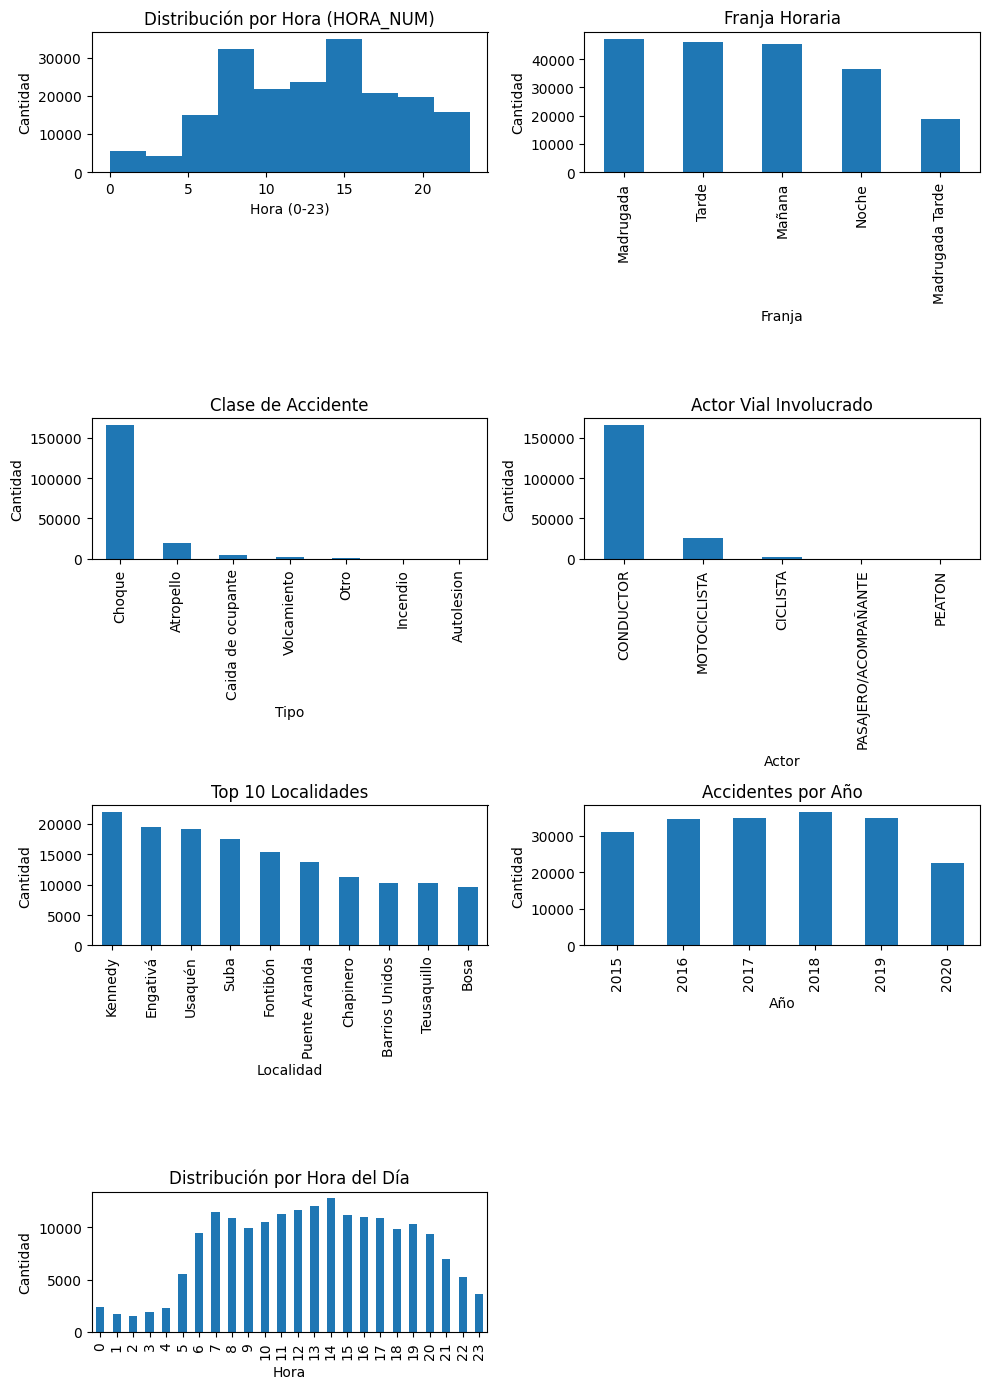

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros de la figura
n_bins = 10
fig, axs = plt.subplots(4, 2, figsize=(10, 14), tight_layout=True)

# 1: Histograma por hora numérica (0-23)
axs[0, 0].hist(df['HORA_NUM'].dropna(), bins=n_bins)
axs[0, 0].set_title('Distribución por Hora (HORA_NUM)')
axs[0, 0].set_xlabel('Hora (0-23)')
axs[0, 0].set_ylabel('Cantidad')

# 2: Conteo por franja horaria
df['HORA_FRANJA'].value_counts().plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Franja Horaria')
axs[0, 1].set_xlabel('Franja')
axs[0, 1].set_ylabel('Cantidad')

# 3: Conteo por tipo de accidente
df['CLASE'].value_counts().plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Clase de Accidente')
axs[1, 0].set_xlabel('Tipo')
axs[1, 0].set_ylabel('Cantidad')

# 4: Conteo por actor vial
df['ACTOR VIAL'].value_counts().plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Actor Vial Involucrado')
axs[1, 1].set_xlabel('Actor')
axs[1, 1].set_ylabel('Cantidad')

# 5: Top 10 localidades con más accidentes
df['LOCALIDAD'].value_counts().head(10).plot(kind='bar', ax=axs[2, 0])
axs[2, 0].set_title('Top 10 Localidades')
axs[2, 0].set_xlabel('Localidad')
axs[2, 0].set_ylabel('Cantidad')

# 6: Conteo por año
df['FECHA'].dt.year.value_counts().sort_index().plot(kind='bar', ax=axs[2, 1])
axs[2, 1].set_title('Accidentes por Año')
axs[2, 1].set_xlabel('Año')
axs[2, 1].set_ylabel('Cantidad')

# 7: Distribución por hora (de la columna 'HORA')
df['HORA'] = pd.to_datetime(df['HORA'], errors='coerce')
df['HORA'].dt.hour.value_counts().sort_index().plot(kind='bar', ax=axs[3, 0])
axs[3, 0].set_title('Distribución por Hora del Día')
axs[3, 0].set_xlabel('Hora')
axs[3, 0].set_ylabel('Cantidad')

# (Espacio vacío o para gráfico adicional si lo deseas)
fig.delaxes(axs[3, 1])  # Eliminamos la última celda vacía para evitar confusión

# Mostrar todos los gráficos
plt.show()


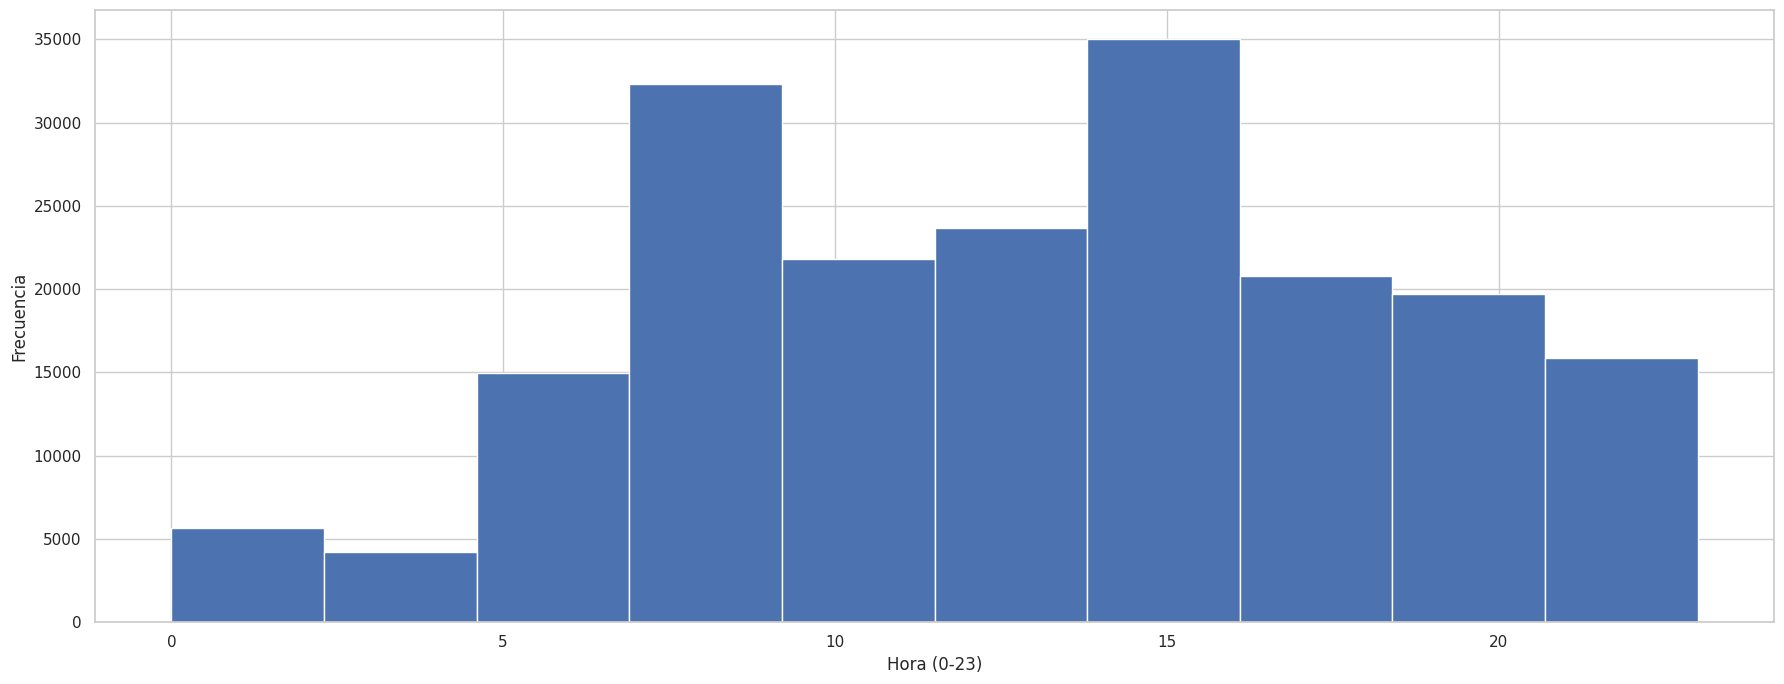

In [31]:
import seaborn as sns
plt.figure(figsize=(18, 7)) 
plt.hist(df['HORA_NUM'].dropna(), bins=n_bins)
sns.set_theme(style='whitegrid')
# plt.title('Distribución por Hora (HORA_NUM)')
plt.xlabel('Hora (0-23)')
plt.ylabel('Frecuencia')
plt.tight_layout()



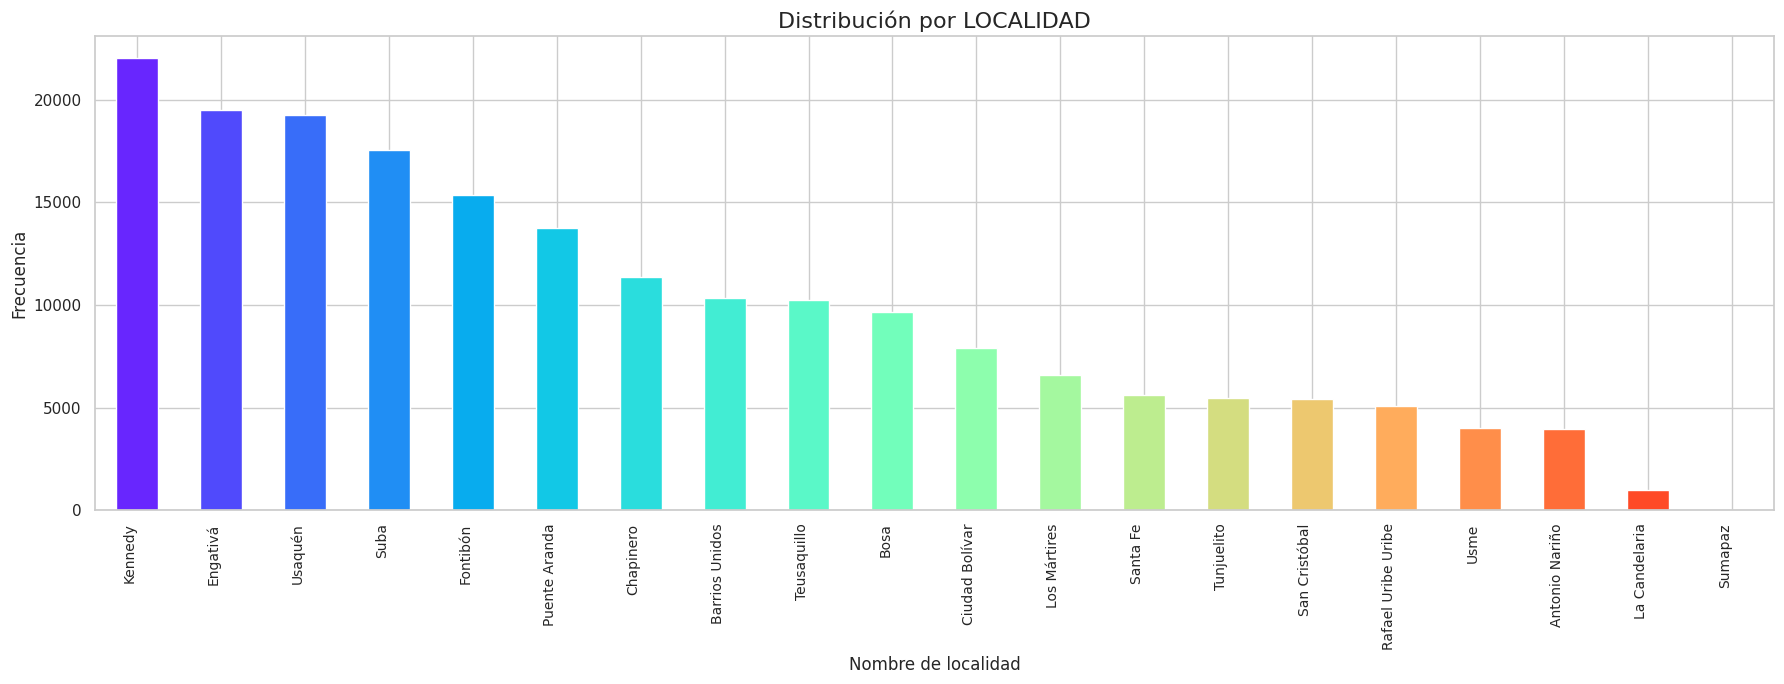

In [30]:
import seaborn as sns
sns.set_theme(style='whitegrid')
plt.figure(figsize=(18, 7)) 
df['LOCALIDAD'].value_counts().plot(kind='bar', color=sns.color_palette("rainbow", len(df['LOCALIDAD'].unique())))
plt.title('Distribución por LOCALIDAD', fontsize=16)
plt.xlabel('Nombre de localidad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [31]:
df.to_csv("siniestros_filtrado.csv", index=False)


# **Correlación**

## Correlación usando label Encoding

A continuación se convierten las variables categóricas a numeros usando códios arbitratios, esto general facilidad al implementar, pero no entrega una correlación específica, por lo que solo se mostrará un gráfico con las variables, su concentración está inducida a errores debido a que el modelo interpreta los valores como si tuvieran un orden o distancia entre ellos.

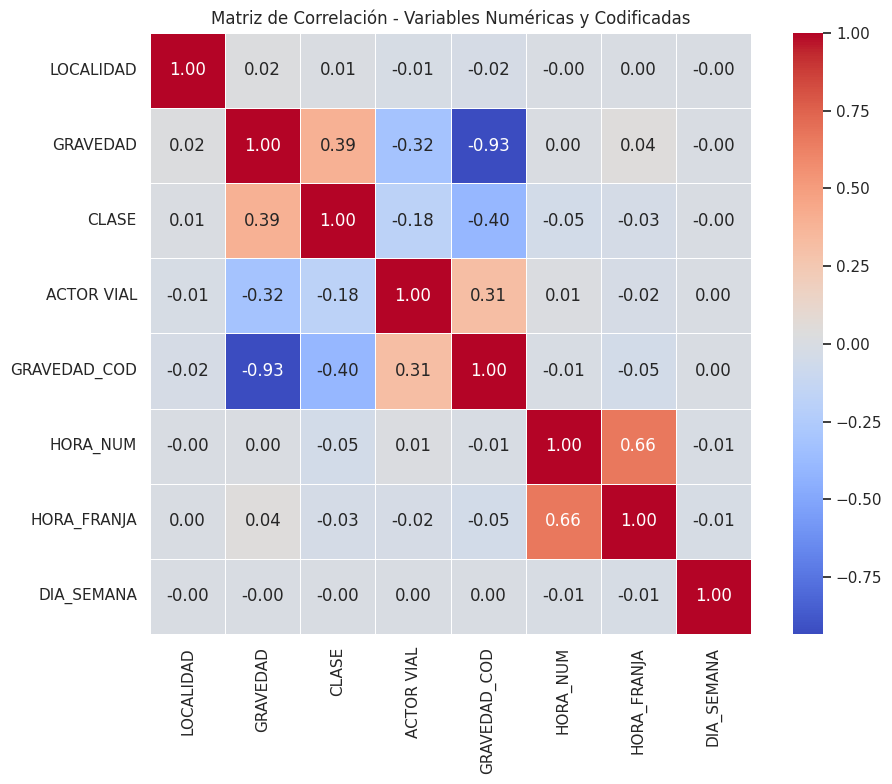

In [38]:
columnas_a_codificar = ['LOCALIDAD', 'GRAVEDAD', 'CLASE', 'ACTOR VIAL', 'HORA_FRANJA', 'DIA_SEMANA']
df_codificado = df.copy()

for col in columnas_a_codificar:
    df_codificado[col] = df_codificado[col].astype('category').cat.codes

matriz = df_codificado.select_dtypes(include='number').corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5)
plt.title('Matriz de Correlación - Variables Numéricas y Codificadas')
plt.tight_layout()
plt.show()

### Matriz de correlación con One-Hot Encoding

se convirtió cada categoría en una columna binaria (0 o 1), sin asumir ningún orden entre ellas.
Si GRAVEDAD_COD tiene una fuerte correlación positiva con CLASE_Atropello, podemos deducir que los atropellos tienden a tener mayor gravedad que otros tipos de accidentes



para la presentación:

Primero exploramos las relaciones usando una codificación simple (Label Encoding), que asigna números a categorías. Esto nos permitió identificar rápidamente qué variables parecen correlacionarse más.
Luego, usamos One-Hot Encoding, una técnica más precisa para variables categóricas, ya que evita errores al no asumir un orden entre categorías.
Con esta matriz, observamos mejor cómo ciertas localidades, tipos de accidentes o franjas horarias se relacionan con la gravedad o la hora del accidente.

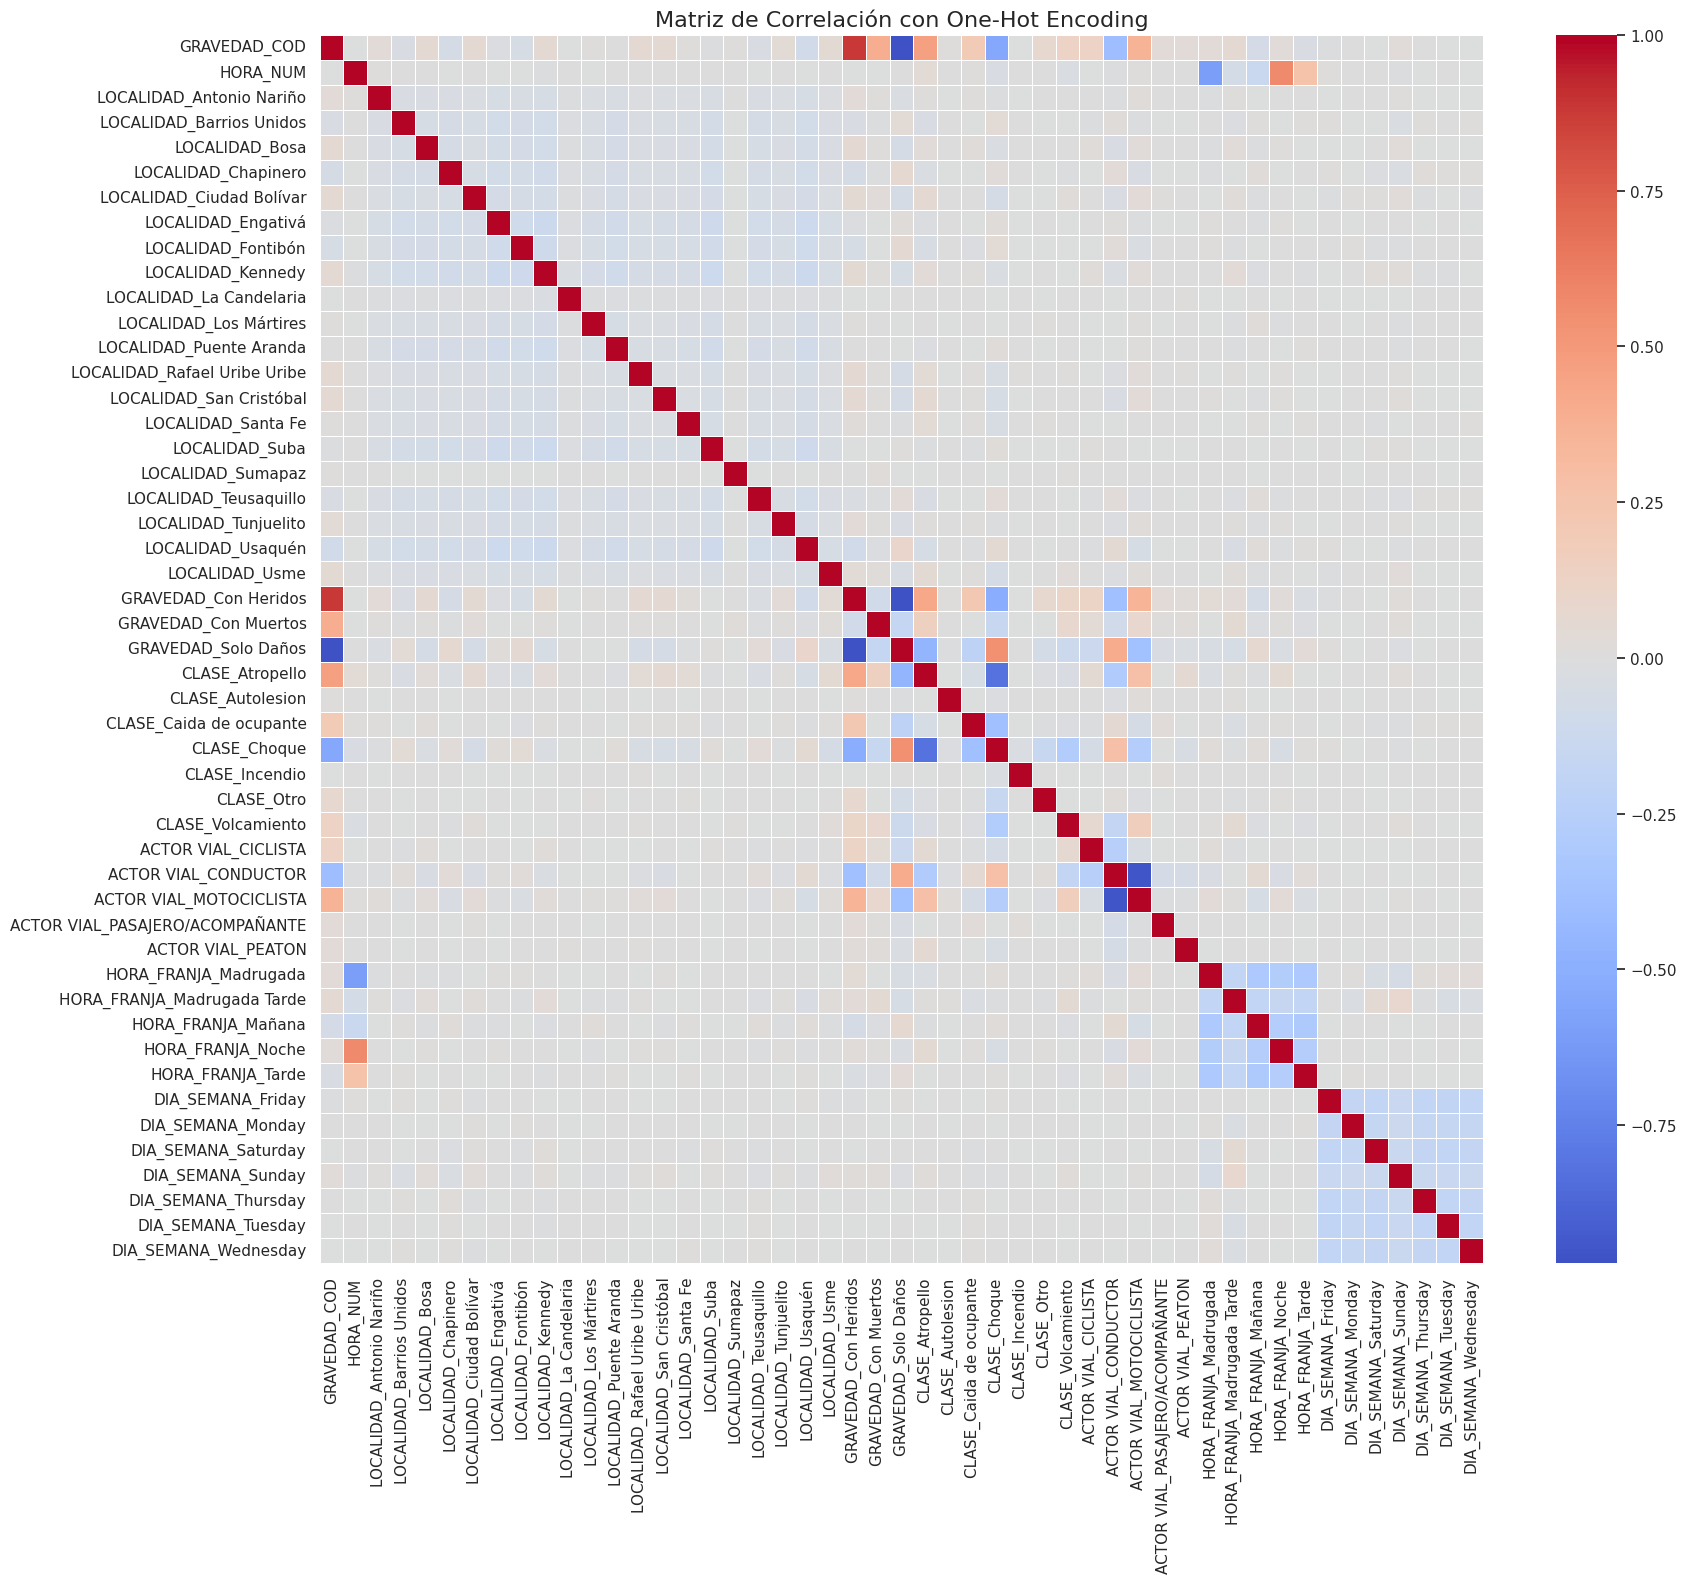

In [48]:
columnas_categoricas = ['LOCALIDAD', 'GRAVEDAD', 'CLASE', 'ACTOR VIAL', 'HORA_FRANJA', 'DIA_SEMANA']
df_encoded = pd.get_dummies(df, columns=columnas_categoricas)

# Calcular la matriz de correlación
matriz_correlacion = df_encoded.corr(numeric_only=True)

# Mostrar un heatmap con seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 16))
sns.heatmap(matriz_correlacion, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Matriz de Correlación con One-Hot Encoding', fontsize=16)
plt.tight_layout()
plt.show()

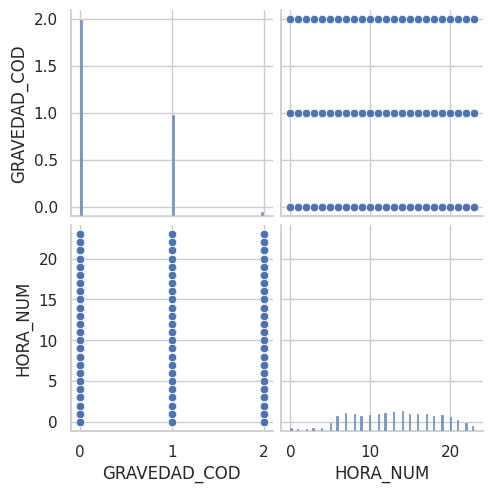

In [32]:
sns.pairplot(df)

Colores cercanos al rojo (positivo fuerte) y azul oscuro (negativo fuerte) indican mayor correlación.

**Podemos visualizar los datos**

Para esto, podemos usar la librería **[Seaborn](https://datascientest.com/es/seaborn-la-herramienta-de-data-visualization-python)**

<img src="https://pypi-camo.freetls.fastly.net/189c5d99fbda79b2218f2d4a4fe29415d32c8d8a/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7761736b6f6d2f736561626f726e2f6d61737465722f646f632f5f7374617469632f6c6f676f2d776964652d6c6967687462672e737667" width=300>



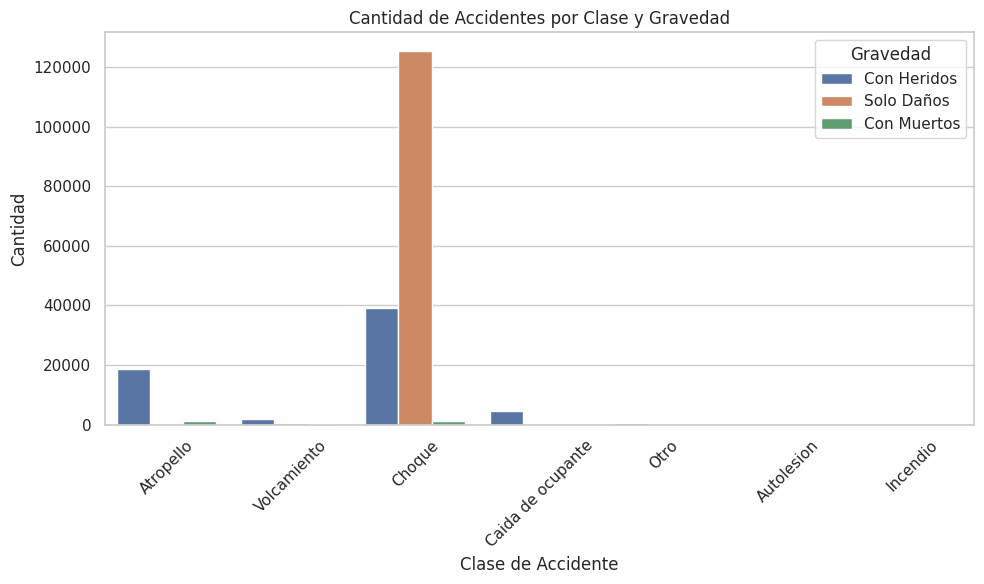

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CLASE', hue='GRAVEDAD')
plt.title('Cantidad de Accidentes por Clase y Gravedad')
plt.xticks(rotation=45)
plt.xlabel('Clase de Accidente')
plt.ylabel('Cantidad')
plt.legend(title='Gravedad')
plt.tight_layout()
plt.show()


En esta primera visualización, observamos la cantidad de accidentes segmentados por clase y gravedad.
Podemos notar que los choques son la clase de accidente más frecuente, seguidos por los atropellos.
Además, es evidente que la mayoría de los accidentes tienen como resultado solo daños, aunque ciertos tipos como el atropello tienen una proporción mayor de accidentes con heridos.
Esto nos da una idea del nivel de riesgo asociado a cada tipo de siniestro

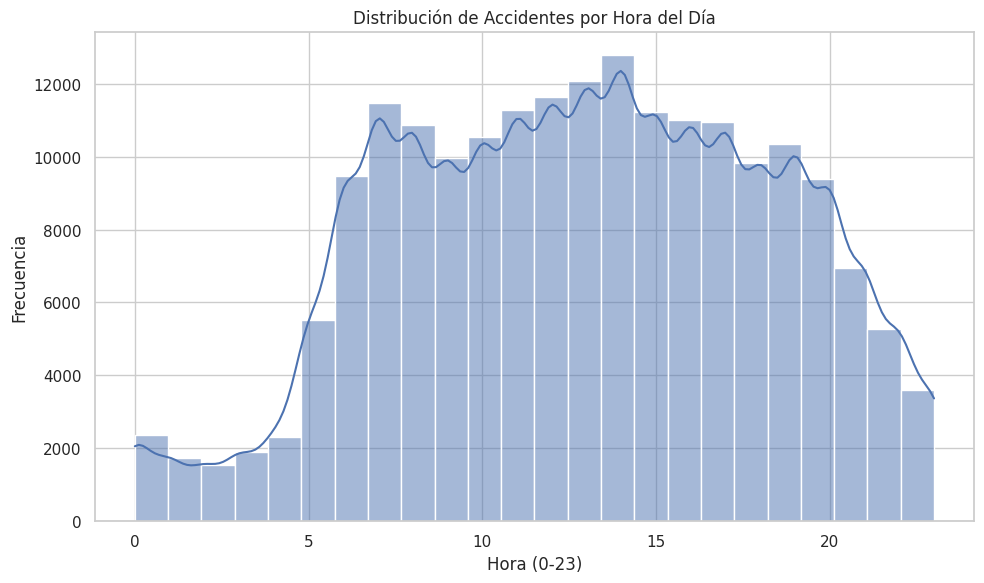

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='HORA_NUM', bins=24, kde=True)
plt.title('Distribución de Accidentes por Hora del Día')
plt.xlabel('Hora (0-23)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


Aquí analizamos la distribución de accidentes a lo largo del día.
Vemos dos picos importantes: uno en la mañana entre las 6 y 9 a.m., y otro entre las 3 y 6 p.m.
Esto sugiere que el tránsito más denso está relacionado con una mayor probabilidad de siniestros.
También hay una pequeña cantidad de accidentes en horas de la madrugada, aunque no se puede descartar el efecto de la fatiga o el consumo de alcohol en esas horas.

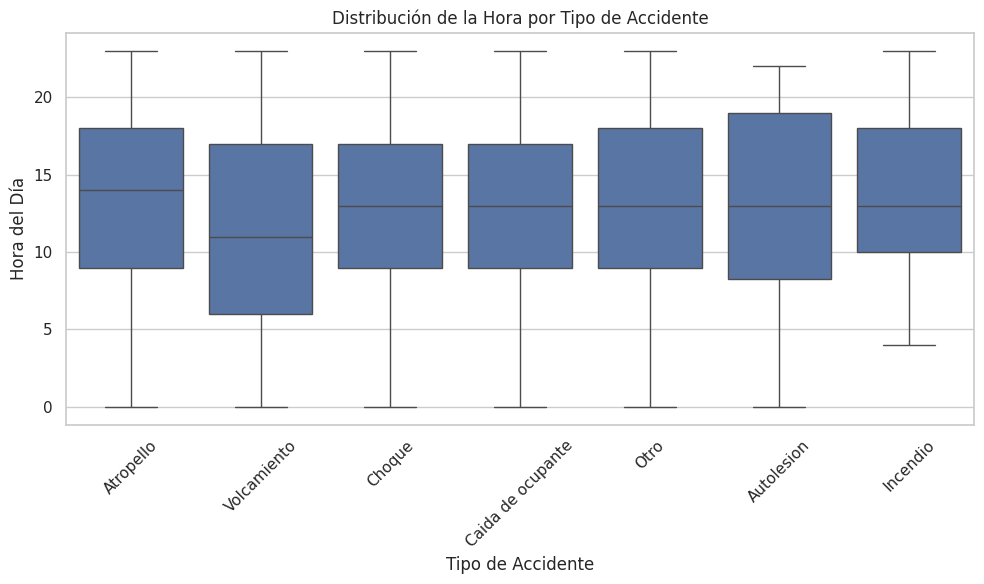

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='CLASE', y='HORA_NUM')
plt.title('Distribución de la Hora por Tipo de Accidente')
plt.xticks(rotation=45)
plt.xlabel('Tipo de Accidente')
plt.ylabel('Hora del Día')
plt.tight_layout()
plt.show()

En esta visualización tipo boxplot, comparamos la hora en que ocurren los accidentes según su clase.
Por ejemplo, los volcamientos tienden a suceder en un rango horario más amplio, incluyendo madrugada.
Los choques tienen una concentración marcada en horas laborales.
El boxplot nos permite visualizar también los valores atípicos y la dispersión horaria asociada a cada tipo de evento.

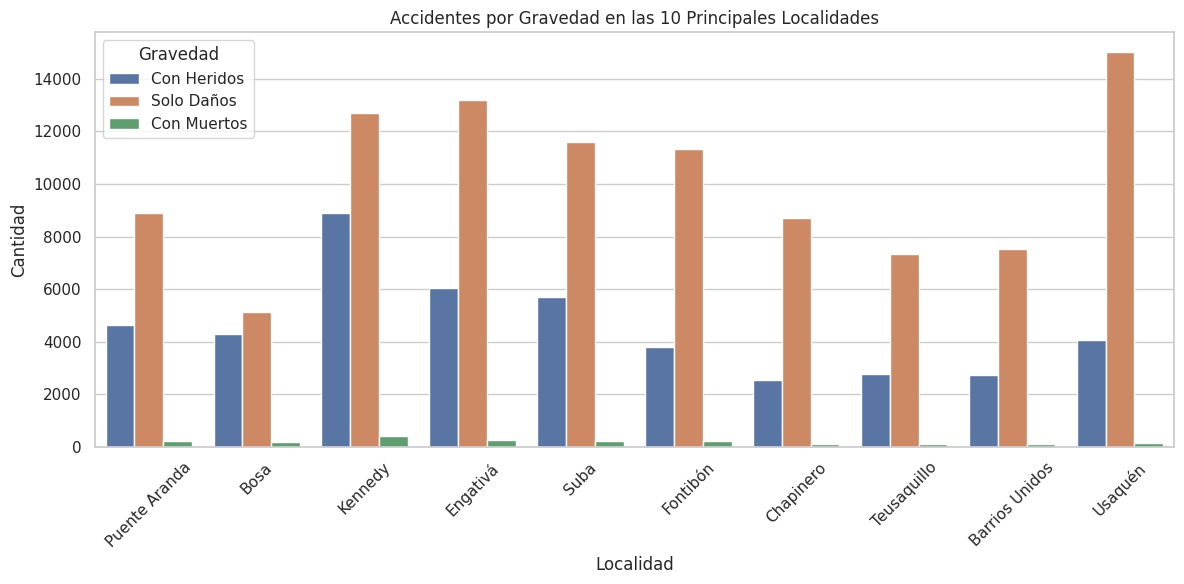

In [52]:
top_localidades = df['LOCALIDAD'].value_counts().head(10).index
df_top = df[df['LOCALIDAD'].isin(top_localidades)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='LOCALIDAD', hue='GRAVEDAD')
plt.title('Accidentes por Gravedad en las 10 Principales Localidades')
plt.xticks(rotation=45)
plt.xlabel('Localidad')
plt.ylabel('Cantidad')
plt.legend(title='Gravedad')
plt.tight_layout()
plt.show()

Este gráfico muestra los 10 sectores de la ciudad con más siniestros.
Se observa que Kennedy, Engativá y Suba son las localidades con mayor cantidad de accidentes, lo cual puede estar relacionado con su densidad poblacional y volumen vehicular.
También se visualiza que en todas las localidades predominan los accidentes con solo daños, aunque Bosa y Ciudad Bolívar muestran una proporción relativamente mayor de eventos con heridos.
Esta información es clave para focalizar estrategias de prevención en zonas críticas

<Axes: xlabel='GRAVEDAD', ylabel='HORA_NUM'>

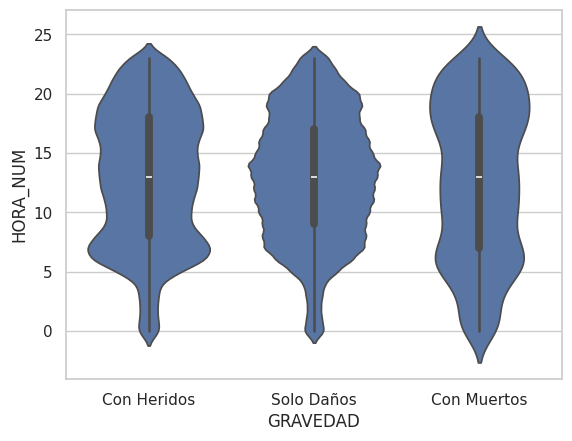

In [53]:
sns.violinplot(x='GRAVEDAD', y='HORA_NUM', data=df)

En este gráfico tipo violinplot, se representa la distribución de la hora en la que ocurren los accidentes, clasificados por nivel de gravedad.
La forma de los violines nos indica la densidad de eventos por hora.
Podemos ver que los accidentes con solo daños se distribuyen de manera más uniforme durante el día.
En cambio, los accidentes con heridos y fatales muestran una mayor concentración en ciertas franjas horarias, como en la noche o la madrugada, lo que podría estar relacionado con condiciones de visibilidad, fatiga o consumo de sustancias.
Este tipo de gráfico es útil para visualizar la concentración y dispersión al mismo tiempo.

## Estas visualizaciones nos permiten entender no solo cuándo y dónde ocurren los siniestros, sino también cómo varía su gravedad según diferentes factores. Con esta información, es posible apoyar decisiones de política pública y acciones preventivas más focalizadas y efectivas